# Árboles de decision

## Ejemplo manual

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams['font.size'] = 20

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
target_classes = list(reversed(data.target_names))

y = data.target == 0 # if zero then we detect malignant tumor.
X = data.data[:, [0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

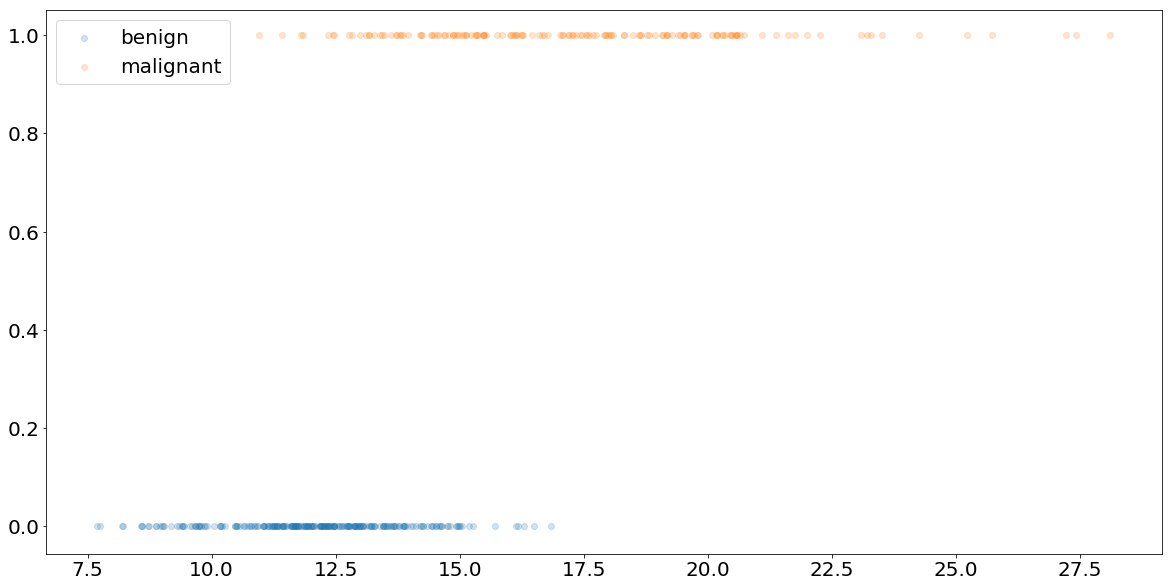

In [4]:
plt.scatter(X_train[~y_train, 0], y_train[~y_train], alpha=0.2, label=target_classes[0])
plt.scatter(X_train[y_train, 0], y_train[y_train], alpha=0.2, label=target_classes[1])
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test_hat = X_test[:, 0] > 13

print("Accuracy score :", accuracy_score(y_test, y_test_hat))
print("Precision :", precision_score(y_test, y_test_hat))
print("Recall :", recall_score(y_test, y_test_hat))
print("F1-score :", f1_score(y_test, y_test_hat))

Accuracy score : 0.7485380116959064
Precision : 0.6
Recall : 0.9523809523809523
F1-score : 0.736196319018405


## Machine Learning

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)

print("Accuracy score :", accuracy_score(y_test, y_test_hat))
print("Precision :", precision_score(y_test, y_test_hat))
print("Recall :", recall_score(y_test, y_test_hat))
print("F1-score :", f1_score(y_test, y_test_hat))

Accuracy score : 0.9181286549707602
Precision : 0.9454545454545454
Recall : 0.8253968253968254
F1-score : 0.8813559322033897


In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

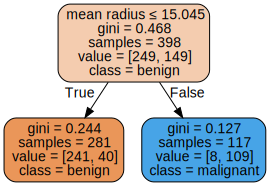

In [12]:
from sklearn.tree import  export_graphviz
import graphviz 
dot_data = export_graphviz(
    clf, out_file=None, 
    class_names=target_classes,
    feature_names=data.feature_names[:1],
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Usando todas las variables

In [13]:
X = data.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_test_hat))
print("Precision :", precision_score(y_test, y_test_hat))
print("Recall :", recall_score(y_test, y_test_hat))
print("F1-score :", f1_score(y_test, y_test_hat))

Accuracy score : 0.935672514619883
Precision : 0.8823529411764706
Recall : 0.9523809523809523
F1-score : 0.916030534351145


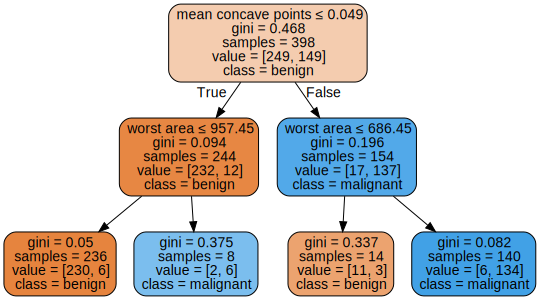

In [14]:
dot_data = export_graphviz(
    clf, out_file=None, 
    feature_names=data.feature_names,
    class_names=target_classes,  
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [15]:
X = data.data

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

In [16]:
scores = []
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_dev_hat = clf.predict(X_dev)
    accuaracy = accuracy_score(y_dev, y_dev_hat)
    f1 = f1_score(y_dev, y_dev_hat)
    scores.append((depth, accuaracy, f1))
scores

[(1, 0.9385964912280702, 0.9066666666666667),
 (2, 0.9385964912280702, 0.9113924050632912),
 (3, 0.9473684210526315, 0.9210526315789473),
 (4, 0.9385964912280702, 0.9066666666666667),
 (5, 0.9210526315789473, 0.88),
 (6, 0.9473684210526315, 0.9210526315789473),
 (7, 0.9385964912280702, 0.9066666666666667),
 (8, 0.9210526315789473, 0.8831168831168831),
 (9, 0.9298245614035088, 0.8918918918918918),
 (10, 0.8859649122807017, 0.8311688311688312),
 (11, 0.8859649122807017, 0.8395061728395061),
 (12, 0.9122807017543859, 0.8717948717948718),
 (13, 0.9298245614035088, 0.8947368421052632),
 (14, 0.9298245614035088, 0.8947368421052632),
 (15, 0.9210526315789473, 0.88),
 (16, 0.9122807017543859, 0.8717948717948718),
 (17, 0.9210526315789473, 0.88),
 (18, 0.9122807017543859, 0.8717948717948718),
 (19, 0.9122807017543859, 0.875),
 (20, 0.9122807017543859, 0.8648648648648649)]